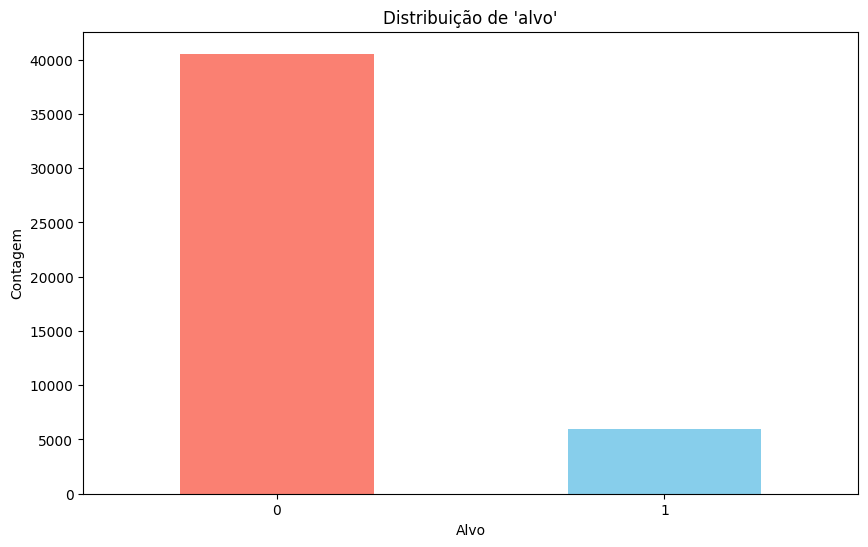

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("Dados Tratados.xlsx")

plt.figure(figsize=(10, 6))
    
# Plotando o gráfico de barras
cross_tab = data['alvo'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])

plt.title("Distribuição de 'alvo'")
plt.xlabel("Alvo")
plt.ylabel("Contagem")
plt.xticks([0, 1], ['0', '1'], rotation=0)
    
plt.show()


alvo
0    40542
1    40542
Name: count, dtype: int64


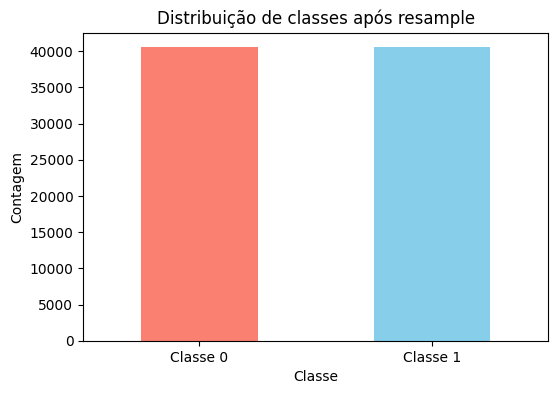

In [15]:
from sklearn.utils import resample

# Separar as classes minoritária e majoritária
classe_maior = data[data['alvo'] == 0]
classe_menor = data[data['alvo'] == 1]

# Fazer resample da classe minoritária com reposição para ter o mesmo número de amostras da classe majoritária
classe_menor_resampled = resample(classe_menor, 
                                  replace=True,     # Amostras são substituídas após cada resample
                                  n_samples=len(classe_maior),    # Número de amostras igual à classe majoritária
                                  random_state=42)  # Reprodutibilidade dos resultados

# Concatenar a classe majoritária com a classe minoritária resampleada
data_resampled = pd.concat([classe_maior, classe_menor_resampled])

# Verificar os novos tamanhos das classes
print(data_resampled['alvo'].value_counts())

# Plotar o gráfico de barras da distribuição do target após o resample
plt.figure(figsize=(6, 4))
data_resampled['alvo'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Distribuição de classes após resample')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Classe 0', 'Classe 1'], rotation=0)
plt.show()


Modelo: Random Forest
Matriz de Confusão:
[[12060   114]
 [   71 12081]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12174
           1       0.99      0.99      0.99     12152

    accuracy                           0.99     24326
   macro avg       0.99      0.99      0.99     24326
weighted avg       0.99      0.99      0.99     24326


Acurácia:
0.992394968346625


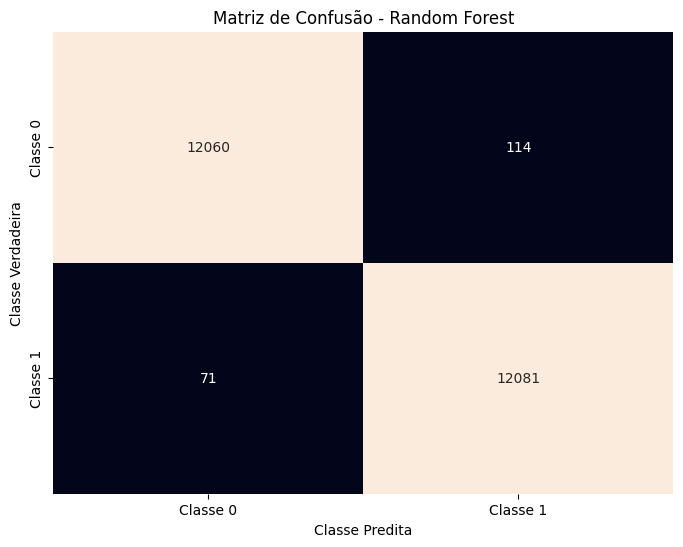


Modelo: Decision Tree
Matriz de Confusão:
[[10216  1958]
 [   62 12090]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     12174
           1       0.86      0.99      0.92     12152

    accuracy                           0.92     24326
   macro avg       0.93      0.92      0.92     24326
weighted avg       0.93      0.92      0.92     24326


Acurácia:
0.9169612760009866


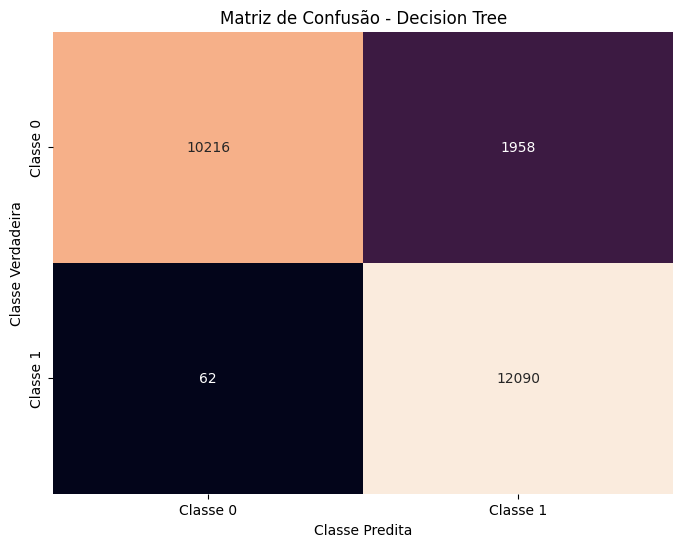

c:\Users\Matheus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Modelo: Logistic Regression
Matriz de Confusão:
[[6699 5475]
 [5598 6554]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.54      0.55      0.55     12174
           1       0.54      0.54      0.54     12152

    accuracy                           0.54     24326
   macro avg       0.54      0.54      0.54     24326
weighted avg       0.54      0.54      0.54     24326


Acurácia:
0.5448080243361013


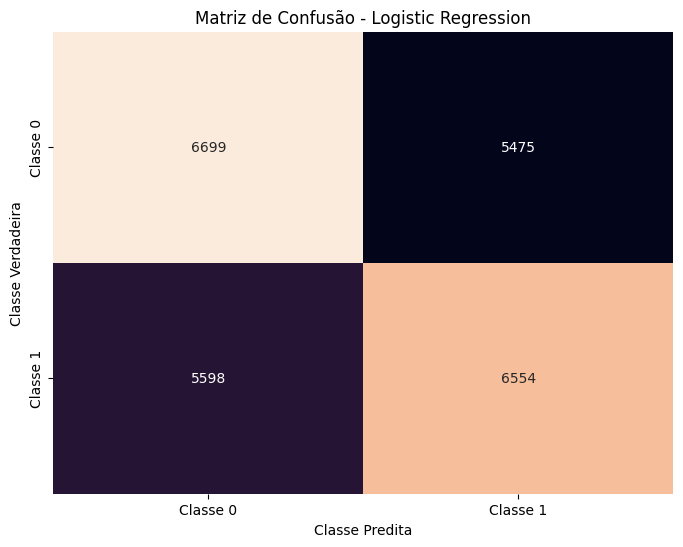


Modelo: K-Nearest Neighbors
Matriz de Confusão:
[[ 7531  4643]
 [  990 11162]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.62      0.73     12174
           1       0.71      0.92      0.80     12152

    accuracy                           0.77     24326
   macro avg       0.80      0.77      0.76     24326
weighted avg       0.80      0.77      0.76     24326


Acurácia:
0.7684370632245334


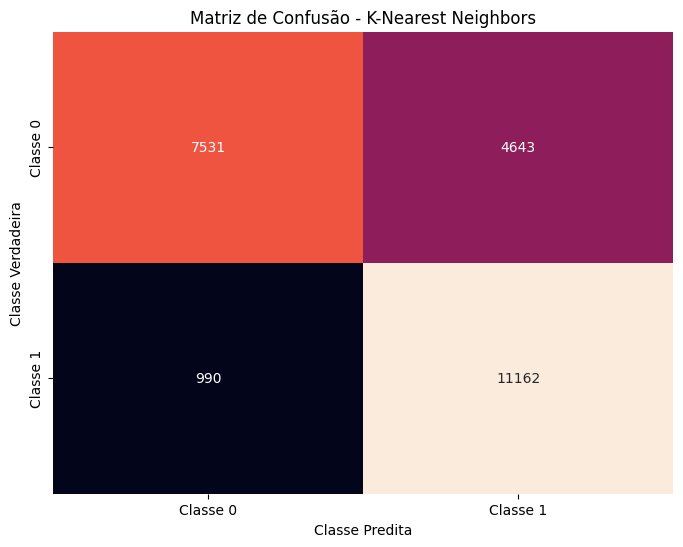

c:\Users\Matheus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Modelo: Support Vector Machine
Matriz de Confusão:
[[3758 8416]
 [3294 8858]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.53      0.31      0.39     12174
           1       0.51      0.73      0.60     12152

    accuracy                           0.52     24326
   macro avg       0.52      0.52      0.50     24326
weighted avg       0.52      0.52      0.50     24326


Acurácia:
0.5186220504809669


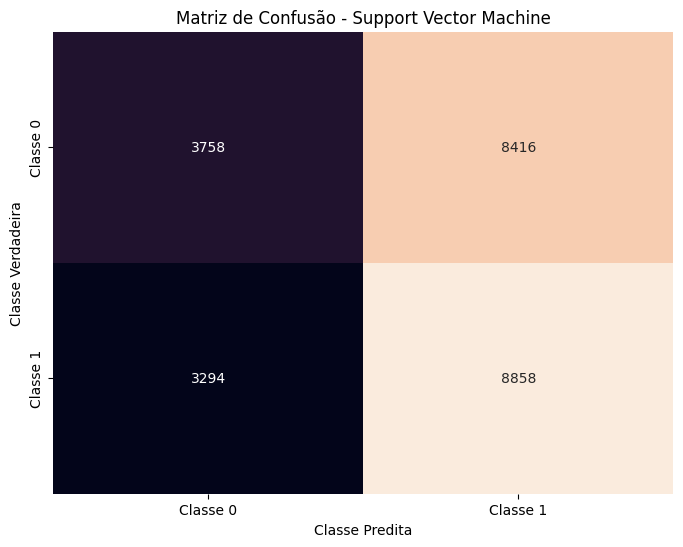


Modelo: Gradient Boosting
Matriz de Confusão:
[[7477 4697]
 [4609 7543]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.62      0.61      0.62     12174
           1       0.62      0.62      0.62     12152

    accuracy                           0.62     24326
   macro avg       0.62      0.62      0.62     24326
weighted avg       0.62      0.62      0.62     24326


Acurácia:
0.6174463536956343


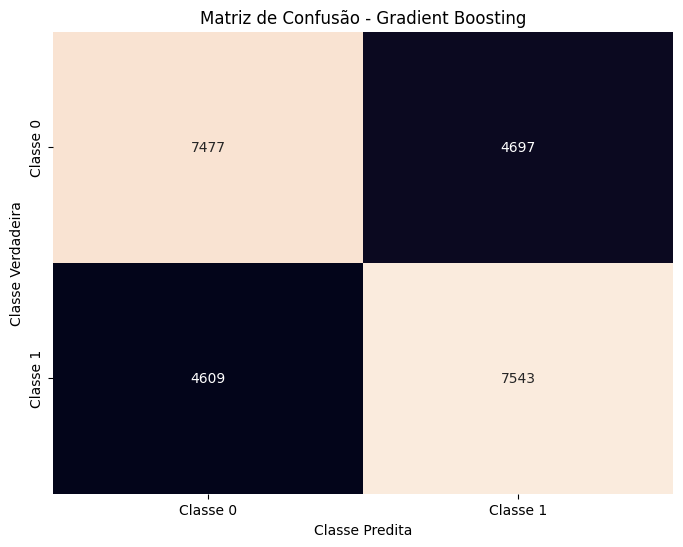

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separar as features (X) e o alvo (y)
x = data_resampled.drop('alvo', axis=1)
y = data_resampled['alvo']

# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Inicializar os modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(kernel='linear', max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

import seaborn as sns

# Treinar e avaliar cada modelo
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Avaliar o modelo
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"\nModelo: {model_name}")
    print("Matriz de Confusão:")
    print(conf_matrix)
    
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    
    print("\nAcurácia:")
    print(accuracy_score(y_test, y_pred))
    
    # Plotar a matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
                xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Verdadeira')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()


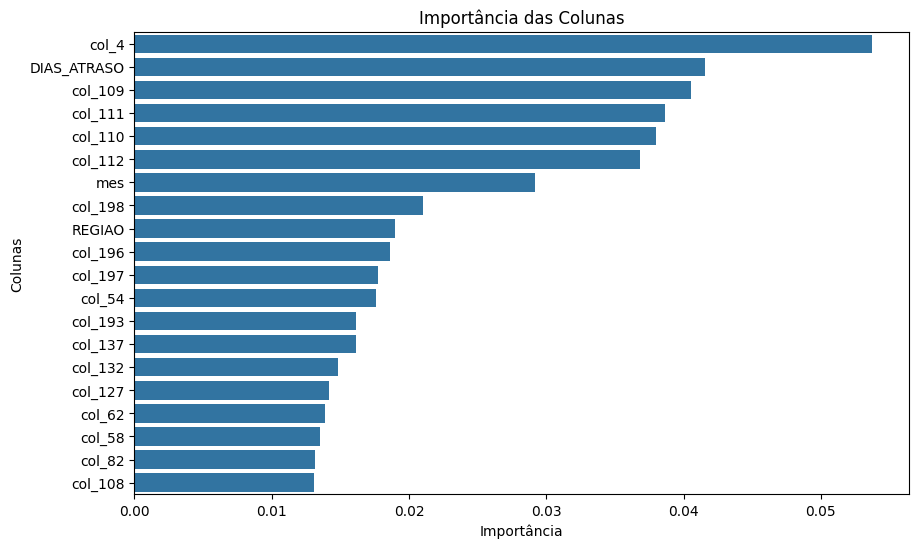

          Coluna  Importancia
1          col_4     0.053764
0    DIAS_ATRASO     0.041538
76       col_109     0.040558
78       col_111     0.038641
77       col_110     0.038024
79       col_112     0.036864
144          mes     0.029199
139      col_198     0.021054
142       REGIAO     0.019017
137      col_196     0.018583
138      col_197     0.017746
31        col_54     0.017592
134      col_193     0.016147
97       col_137     0.016123
92       col_132     0.014857
87       col_127     0.014207
39        col_62     0.013893
35        col_58     0.013550
53        col_82     0.013148
75       col_108     0.013062
143          dia     0.012950
93       col_133     0.012666
43        col_66     0.012268
135      col_194     0.012074
30        col_53     0.012060
145          ano     0.012022
127      col_185     0.011767
88       col_128     0.011256
126      col_184     0.011010
83       col_123     0.010733


In [17]:
# Separar as features (X) e o alvo (y)
x = data_resampled.drop('alvo', axis=1)
y = data_resampled['alvo']

# Inicializar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo no conjunto completo de dados
model.fit(x, y)

# Avaliar a importância das características
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Coluna': x.columns, 'Importancia': importances})
feature_importance = feature_importance.sort_values(by='Importancia', ascending=False)

# Plotar a importância das características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Coluna', data=feature_importance[:20], legend=False)
plt.title('Importância das Colunas')
plt.xlabel('Importância')
plt.ylabel('Colunas')
plt.show()

print(feature_importance.head(30))

Best accuracy of: 0.979915 using {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Matriz de Confusão:
[[12038   136]
 [   82 12070]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12174
           1       0.99      0.99      0.99     12152

    accuracy                           0.99     24326
   macro avg       0.99      0.99      0.99     24326
weighted avg       0.99      0.99      0.99     24326


Acurácia:
0.9910383951327797


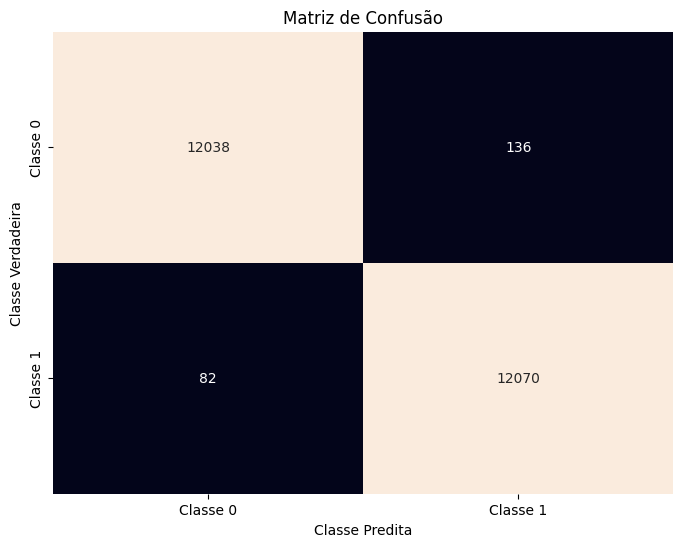

In [18]:
from sklearn.model_selection import GridSearchCV

# Separar as features (X) e o alvo (y)
x = data_resampled[feature_importance[:10]['Coluna']]
y = data_resampled['alvo']

# Separar os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Inicializar o modelo
model = RandomForestClassifier(random_state=42)

# Definir os parâmetros para a busca em grade
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar a busca em grade
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Executar a busca em grade no conjunto de treinamento
grid_search.fit(x_train, y_train)

# Melhores Parametros Encontrados
print("Best accuracy of: %f using %s" % (grid_search.best_score_,
                                         grid_search.best_params_))

# Obter o melhor modelo encontrado pela busca em grade
best_model = grid_search.best_estimator_

# Treinar o melhor modelo com todo o conjunto de treinamento
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)
    
# Avaliar o modelo
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão:")
print(conf_matrix)
    
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
    
print("\nAcurácia:")
print(accuracy_score(y_test, y_pred))
    
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
    xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title(f'Matriz de Confusão')
plt.show()

In [26]:
# Extrair os valores da matriz de confusão
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]

# Calcular a specificity
specificity = tn / (tn + fp)

print(f"Taxa de Acerto de Verdadeiro Negativo (Specificity): {specificity:.4f}")

Taxa de Acerto de Verdadeiro Negativo (Specificity): 0.9888


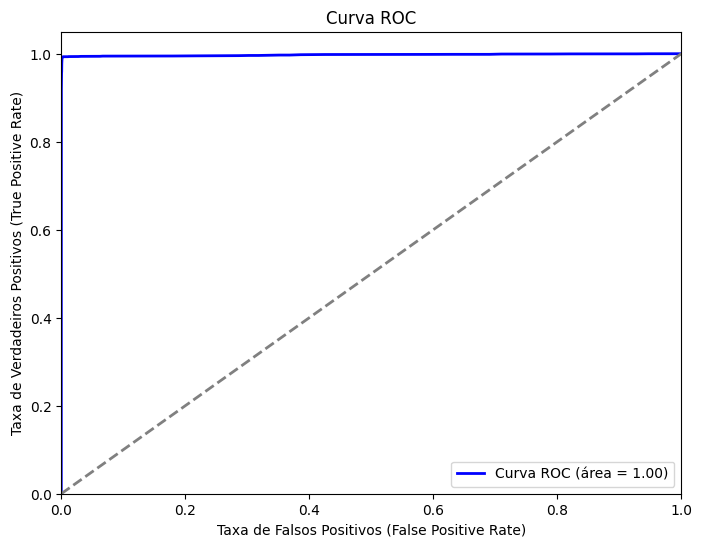

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obter as probabilidades preditas para a classe positiva
y_prob = best_model.predict_proba(x_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


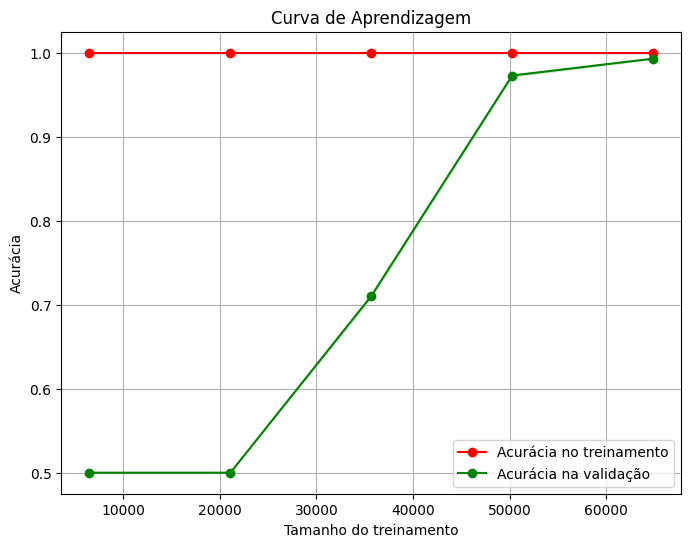

In [20]:
from sklearn.model_selection import learning_curve
import numpy as np

plt.figure(figsize=(8, 6))
plt.title("Curva de Aprendizagem")
plt.xlabel("Tamanho do treinamento")
plt.ylabel("Acurácia")
train_sizes, train_scores, test_scores = learning_curve(best_model, x, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Acurácia no treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Acurácia na validação")

plt.legend(loc="best")
plt.show()

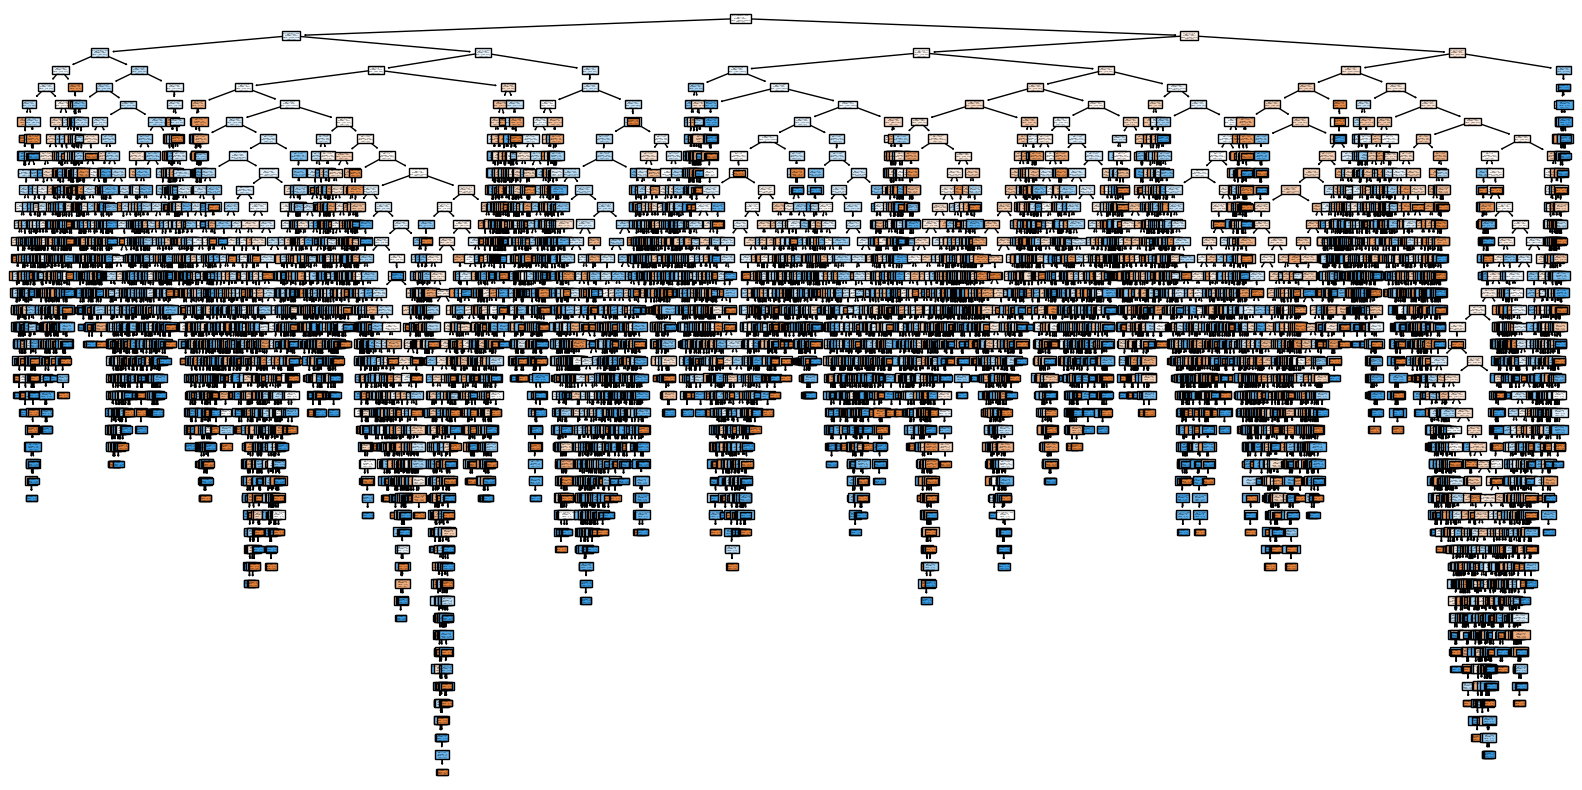

In [21]:
from sklearn.tree import plot_tree

# Ajuste o tamanho da figura conforme necessário
plt.figure(figsize=(20,10))

# Acessar uma das árvores individuais dentro do Random Forest
# Aqui, acessamos a primeira árvore
estimator = best_model.estimators_[0]

# Visualize a árvore de decisão
plot_tree(estimator, filled=True, feature_names=x.columns, class_names=True)

# Exiba a visualização
plt.show()

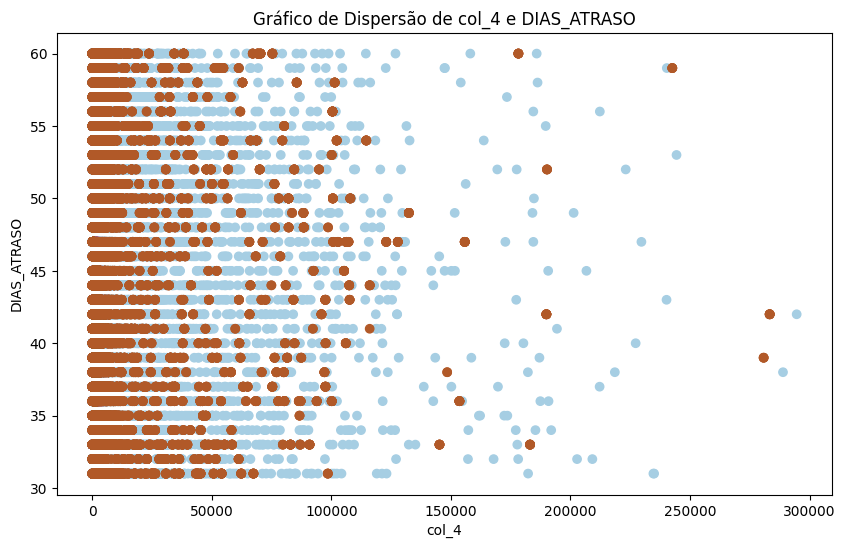

In [22]:
# Plotar um gráfico de dispersão das duas características com cores representando as classes
plt.figure(figsize=(10, 6))
plt.scatter(data_resampled["col_4"], data_resampled["DIAS_ATRASO"], c=data_resampled['alvo'], cmap=plt.cm.Paired)
plt.xlabel("col_4")
plt.ylabel("DIAS_ATRASO")
plt.title('Gráfico de Dispersão de col_4 e DIAS_ATRASO')
plt.show()

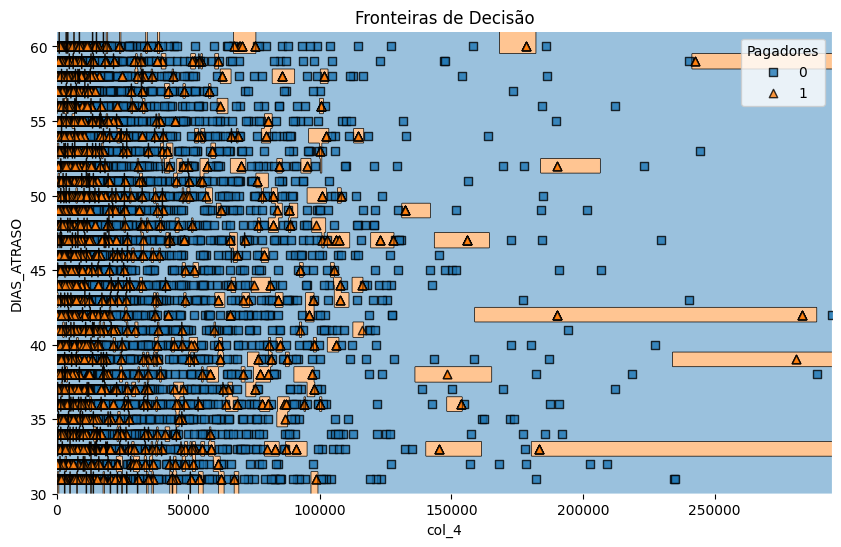

In [23]:
from mlxtend.plotting import plot_decision_regions

x_decision = x[["col_4", "DIAS_ATRASO"]].values
y_decision = y.values

# Melhores parâmetros encontrados durante a busca em grade
best_params = grid_search.best_params_

# Inicializar o modelo com os melhores parâmetros
model_decision = RandomForestClassifier(random_state=42, **best_params)

model_decision.fit(x_decision, y_decision)

# Plotando as regiões de decisão
plt.figure(figsize=(10, 6))

# Converter os DataFrames em arrays NumPy como plot_decision_regions requer
plot_decision_regions(x_decision, y_decision, clf=model_decision, legend=2)
plt.xlabel("col_4")
plt.ylabel("DIAS_ATRASO")
plt.title('Fronteiras de Decisão')

# Adicionando a legenda
plt.legend(title="Pagadores")
plt.show()

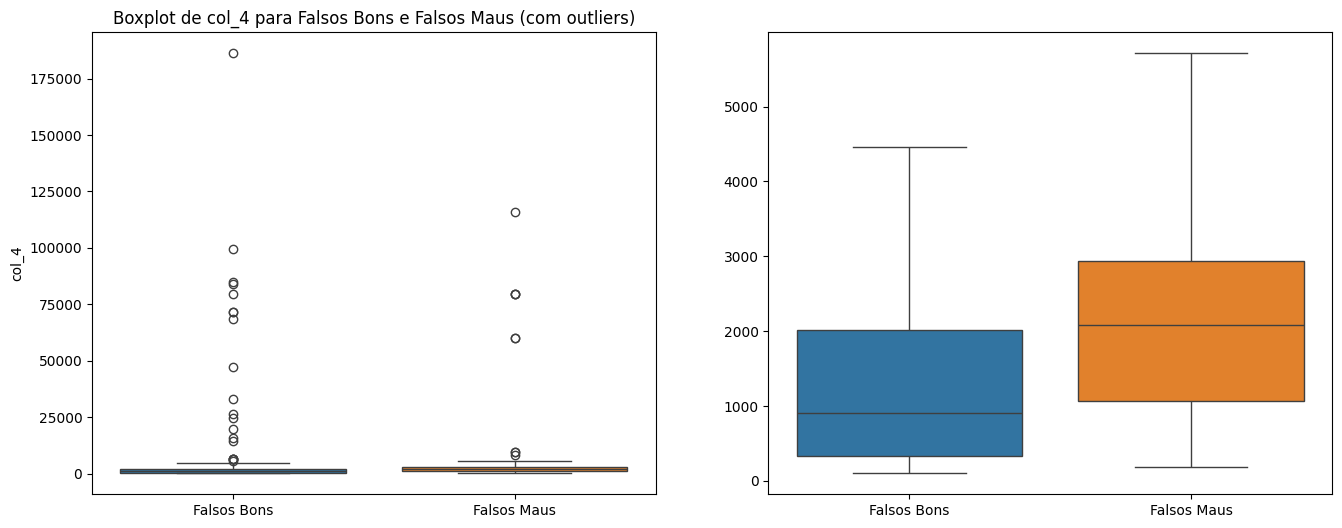

In [28]:
x_test.reset_index(drop=True, inplace=True)

# Identificar os índices dos falsos positivos e falsos negativos
false_positives = np.where((y_pred == 1) & (y_test == 0))[0]
false_negatives = np.where((y_pred == 0) & (y_test == 1))[0]

# Extrair os valores de col_4 correspondentes a esses índices
col_4_false_positives = x_test.loc[false_positives, 'col_4']
col_4_false_negatives = x_test.loc[false_negatives, 'col_4']

# Criar um DataFrame com os valores de col_4 dos falsos positivos e falsos negativos
resultados = pd.DataFrame({'Falsos Bons': col_4_false_positives, 'Falsos Maus': col_4_false_negatives})

# Plotar os boxplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=resultados,  ax=axes[0])
axes[0].set_title('Boxplot de col_4 para Falsos Bons e Falsos Maus')
axes[0].set_ylabel('col_4')
sns.boxplot(data=resultados, ax=axes[1], showfliers=False)
axes[0].set_title('Boxplot de col_4 para Falsos Bons e Falsos Maus (com outliers)')
axes[0].set_ylabel('col_4')

plt.show()

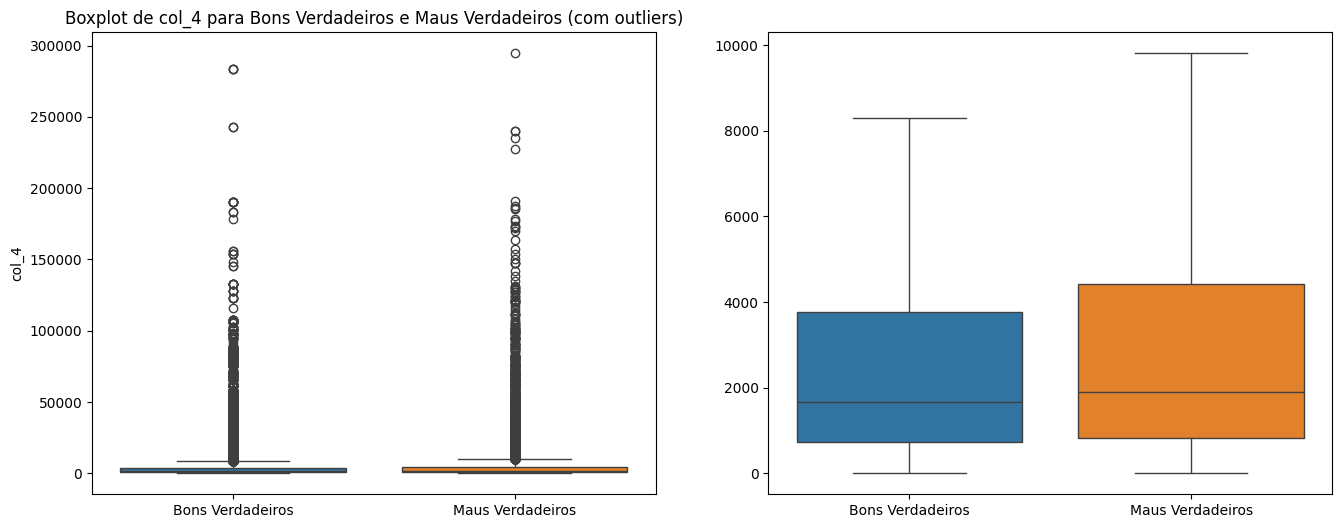

70233800.28


In [25]:
# Identificar os índices dos falsos positivos e falsos negativos
true_positives = np.where((y_pred == 1) & (y_test == 1))[0]
true_negatives = np.where((y_pred == 0) & (y_test == 0))[0]

# Extrair os valores de col_4 correspondentes a esses índices
col_4_true_positives = x_test.loc[true_positives, 'col_4']
col_4_true_negatives = x_test.loc[true_negatives, 'col_4']

# Criar um DataFrame com os valores de col_4 dos falsos positivos e falsos negativos
resultados = pd.DataFrame({'Bons Verdadeiros': col_4_true_positives, 'Maus Verdadeiros': col_4_true_negatives})

# Plotar os boxplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=resultados,  ax=axes[0])
axes[0].set_title('Boxplot de col_4 para Bons Verdadeiros e Maus Verdadeiros')
axes[0].set_ylabel('col_4')
sns.boxplot(data=resultados, ax=axes[1], showfliers=False)
axes[0].set_title('Boxplot de col_4 para Bons Verdadeiros e Maus Verdadeiros (com outliers)')
axes[0].set_ylabel('col_4')

plt.show()

print(x_test.loc[true_negatives, 'col_4'].sum())